# Galaxy Populations and Visualization

**This activity explores ways of interfacing with the SDSS database, retrieving and visualizing data about the population of galaxies in the Universe. This notebook is intended to be run in the SciServer Compute platform.**  

This tutorial developed by Karen Masters for ASTR352 at Haverford College, borrows heavilly from [Week 3: Data Querying and Visualization](https://github.com/brittlundgren/SDSS-EPO/tree/master/SciServer_notebooks), part of a series of SciServer based Astronomy notebook tutorials by Britt Lundgren. 

As with all Jupyter Notebook tutorials, the procedure you should follow is to run each cell for yourself. You will see places below where you are asked to experiment with adding code, or copying lines of code and changing numbers (and excellent example of coding in practice). 

There are also places where you are asked to edit the Markdown (click on the cell to edit it) to answer various questions. 

For this Notebook please download as a PDF to turn the entire thing in on Moodle. 


# Introduction to the SciServer 
SciServer.org provides a means of interacting with astronomical imaging and spectroscopy data from the [Sloan Digital Sky Survey](http://sdss.org).  

The following python notebook gives an example of how you can use [SciServer Compute](http://www.sciserver.org/tools/compute/) for your own astronomy research from anywhere with access to the internet. Because of SciServer's unique capabilities, you can access and analyze the vast SDSS dataset in the cloud without downloading anything (including code!) to your local computer.   All you need in order to get started is a web browser! 

For this course we will be using the programming language Python 3 to interface with the SciServer, although you can also write scripts using R. A complete tutorial to Python 3 can be accessed [here](https://docs.python.org/3/tutorial/).  A shorter tutorial with some basics is provided below.

## Getting Started with SciServer

1. The first thing you need to do is to set up an account with [SciServer Compute](http://compute.sciserver.org/). See [these instructions](https://github.com/brittlundgren/SDSS-EPO/blob/master/SciServer_registration_instructions.pdf) for help.

2. Once you are logged in to your account, create a container for your SciServer work.

3. Within that container, you can create a new Python 3 notebook, which allows you to write and run your code online. You may find it easier to simply work within this notebook by modifying the cells below.  There are blank cells following prompts labeled "Experiment", where you can add your own code.

4. Try writing a few lines of code and click the "play" button (alternatively, "Shift+Return") to run your code:


## I. Visualizing Data

**The standard Python library for plotting and visualization is called _Matplotlib_$^{1}$.  Below are a few examples showing what it can do.**  

An excellent tutorial can also be found here: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

$^{1}$J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.


In [1]:
# import matplotlib and some of its modules, and tell Notebook to plot inline. 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('OK')

OK


If you don't receive any errors after running the blocks of code above, you can try playing around with the libraries.  Shown below are a few examples of figures that can be made using Matplotlib. Please run the code to convince yourself it works, and discuss with your coding partner what it is doing. 

Simple demo of a Scatter plot: 

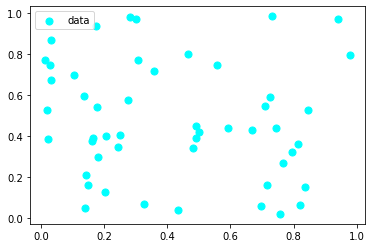

In [2]:
"""
Simple demo of a scatter plot.
http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
"""
import numpy as np

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x,y, s = 50,c='cyan', label = 'data')
plt.legend()
plt.show()

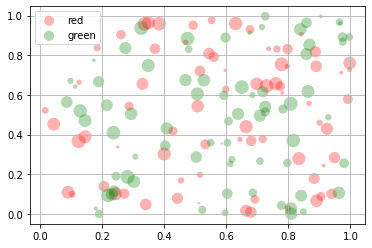

In [3]:
"""
Slightly more complext demo of a scatter plot.
http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html
"""

import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
for color in ['red', 'green']:
    n = 75
    x, y, z = rand(3,n)
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Matplot lib contains examples of many common plot styles. My advice for any plotting task, is to never start by writing your own plot code, always see if there's an example you can modify. For example histograms are used a lot in astronomy, and are easy to make: 

Sample size: 1000
Mean: -0.04
Median: 0.02


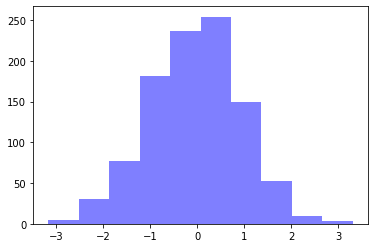

In [4]:
"""
Simple demo of a histogram.
http://matplotlib.org/examples/frontpage/plot_histogram.html
"""

# Let's make a random normal (Gaussian) distribution, centered on 0, with a standard deviation of 1
mu = 0
sigma = 1
samplesize = 1000
s = np.random.normal(mu,sigma, samplesize)

print ("Sample size: {:.0f}".format(samplesize))
print ("Mean: {:.2f}".format(np.mean(s)))
print ("Median: {:.2f}".format(np.median(s)))

plt.hist(s, bins=10, color='blue', alpha=0.5)
plt.show()

## Your Turn

This [thumbnail gallery](http://matplotlib.org/1.2.1/gallery.html) is useful for finding example code for making just about any kind of plot or visualization you can think of. If you're a fan of [XKCD](http://xkcd.com/), you can also XKCD-ify your plots with the code found [here](http://matplotlib.org/xkcd/gallery.html) :)

Pick a plot style you like (other than a simple scatter plot or histogram) from Matplotlib [thumbnail gallery](http://matplotlib.org/1.2.1/gallery.html) and include it in this notebook. 

Extension activity (for those finding this easy - no judgement will be applied either way): make it a plot style you can find an example of in an astronomical paper.... and also show the example from the paper. 

In [5]:
# Put your code here

## II. Importing SciServer and other important libraries
The SciServer team has written a number of libraries, generally prefixed with "SciServer", that assist in various functions. As with all Python libraries, they must be actively imported before being used, even when running a Notebook in the Sciserver environment.

The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.

In [5]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
print('SciServer libraries imported')

SciServer libraries imported


In [6]:
# Apply some special settings to the imported libraries

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', None)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

Settings applied


## III. Querying the Sloan Digital Sky Survey's database (SDSS DR17)
The next code block searches the SDSS Data Release 17 database via the CasJobs API. 

Documentation on the SciServer Python libraries can be found on the SciServer Python documentation site at:
http://www.sciserver.org/docs/sciscript-python/

An extensive tutorial on how to query the SDSS database can be found here:
http://cas.sdss.org/dr16/en/help/howto/search/searchhowtohome.aspx

The paper describing the SDSS Data Release 17 (which I co-ordinated the writing of as SDSS-IV Spokesperson) is available at the following link: https://ui.adsabs.harvard.edu/abs/2022ApJS..259...35A/abstract

There is also a lot of documentation on which Tables, Columns and "Views" of Tables are availabe here: http://cas.sdss.org/dr17/en/help/browser/browser.aspx

Run the code block below to query DR17 to get a random 16 "nice looking galaxies" (big in angular scale and bright). This query makes use of the "Galaxy" view of "PhotoPrimary" table, which is objects from "Photoprimary" which have been classified as galaxies (instead of e.g. stars). 

In [7]:
# Find objects in the Sloan Digital Sky Survey's Data Release 17.
#
# Query the Sloan Digital Sky Serveys' Data Release 17.
# For the database schema and documentation see http://skyserver.sdss.org/dr17
#
# This query finds "a 4x4 grid of nice-looking galaxies": 
#   galaxies in the SDSS database that have a spectrum 
#   and have a size (petror90_r) larger than 10 arcsec.
# 
# First, store the query in an object called "query"
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr17")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r
objId,,,,,
1237658424623104043,149.646529,6.960838,13.30879,16.32425,15.41649
1237671122693193777,149.650944,13.255304,13.64148,14.62470,14.27268
1237648720143712324,149.654673,-0.929505,12.09609,15.62343,14.68135
1237648722828066973,149.659337,1.057981,20.63465,15.45252,14.55437
1237665127456899083,149.667064,28.877556,15.23387,14.55123,13.63257
1237654652030746680,134.562077,47.176213,12.90297,16.39030,15.43807
1237678617423183997,12.156608,1.247656,13.13330,15.87933,15.04946
1237649920582811786,30.300434,14.103373,13.31015,16.69100,16.05856
1237651251512017170,239.025963,52.154673,17.11200,16.36437,15.82378


**Question for you to answer:** What are the units of ```Petro_r90```? What are ```u``` and ```g```? Which magnitudes does SDSS have available?

(HINT: To answer this look at the columns available in the "Galaxy" view of the "PhotoPrimary" Table - see the right side drop down menus at http://cas.sdss.org/dr17/en/help/browser/browser.aspx)

[DELETE THIS AND TYPE YOUR ANSWER HERE]

#### EXPERIMENT:  What happens if you change the query?

Try changing the query in the following ways: 
- Return 8 matching objects insetad of 16.
- Add a column which returns redshift: ```s.z```
- Select only nearby galaxies (redshift < 0.05).
- Select only galaxies likely to be starforming (with u-r color >= 2.22)
- Search for galaxies likely to be old (g-r>=0.6). 

What changes do you notice in the table of returned results?

[DELETE THIS AND TYPE YOUR ANSWER HERE]

Try it in the code block below:

In [9]:
# your code here

## III: Tables, Panda and Data Frames

The SciServer query returns something called ```gals``` which is an example of a data frame - specifically this is a table of data with a set of rows and columns (strictly speaking you can change the format which is returned, but something called a "panda dataframe" is the default).

The Sciserver modules make use of [Pandas](http://pandas-docs.github.io/pandas-docs-travis/) to organizes these data. 

The cells below provide a quick intro to Panda... you can find more on their website. Even if you already use it, you can always learn something new.  

In [8]:
#import Pandas (for good coding, you would usually put this at the top of your Notebook)
import pandas as pd
print('Pandas is imported')

Pandas is imported


In [9]:
#Show the top rows
gals.head()

,ra,dec,petror90_r,g,r
objId,,,,,
1237658424623104043,149.646529,6.960838,13.30879,16.32425,15.41649
1237671122693193777,149.650944,13.255304,13.64148,14.62470,14.27268
1237648720143712324,149.654673,-0.929505,12.09609,15.62343,14.68135
1237648722828066973,149.659337,1.057981,20.63465,15.45252,14.55437
1237665127456899083,149.667064,28.877556,15.23387,14.55123,13.63257


In [10]:
#For a useful set of summary statistics of what's in each column: 
gals.describe()

,ra,dec,petror90_r,g,r
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,171.262351,33.035790,13.636228,15.827604,15.115661
std,71.718834,23.064392,2.371888,0.778837,0.844652
min,12.156608,-0.929505,11.242400,14.485580,13.632570
25%,149.649840,11.681688,12.219518,15.417060,14.636945
50%,170.002951,46.678678,13.221045,15.910940,15.169305
75%,239.030993,49.108589,13.782267,16.370853,15.573723
max,239.046320,61.711680,20.634650,16.978890,16.458480


In [11]:
#Select a single column (e.g. to make a plot, or do math)
ra=gals['ra']
print(ra)

objId
1237658424623104043    149.646529
1237671122693193777    149.650944
1237648720143712324    149.654673
1237648722828066973    149.659337
1237665127456899083    149.667064
1237654652030746680    134.562077
1237678617423183997     12.156608
1237649920582811786     30.300434
1237651251512017170    239.025963
1237655130908262610    239.041297
1237655463769800835    190.343538
1237655464319909974    239.032118
1237655464319910021    239.030618
1237655464319975688    239.041260
1237658311868547116    190.338838
1237659330848292959    239.046320
Name: ra, dtype: float64


In [12]:
#Sometimes that's not enough - to turn a column into a numpy array (usually for reasons of math)
ra = gals['ra'].to_numpy
print(ra)

<bound method IndexOpsMixin.to_numpy of objId
1237658424623104043    149.646529
1237671122693193777    149.650944
1237648720143712324    149.654673
1237648722828066973    149.659337
1237665127456899083    149.667064
1237654652030746680    134.562077
1237678617423183997     12.156608
1237649920582811786     30.300434
1237651251512017170    239.025963
1237655130908262610    239.041297
1237655463769800835    190.343538
1237655464319909974    239.032118
1237655464319910021    239.030618
1237655464319975688    239.041260
1237658311868547116    190.338838
1237659330848292959    239.046320
Name: ra, dtype: float64>


In [13]:
#Select a subset of data based on column values  (aka Boolean indexing or "slicing") 
# - seriously my group does this ALL THE TIME!
# np.where() is a similar process.
neargals=gals[gals['petror90_r']>15]
neargals.head()

,ra,dec,petror90_r,g,r
objId,,,,,
1237648722828066973,149.659337,1.057981,20.63465,15.45252,14.55437
1237665127456899083,149.667064,28.877556,15.23387,14.55123,13.63257
1237651251512017170,239.025963,52.154673,17.11200,16.36437,15.82378


Question to think about: why would I call this selection on angular size "neargals"? 

[WRITE YOUR ANSWER HERE]

In [14]:
#Add a column based on some math, for example a classic colour in extragalactic circles is g-r, so...
grcolour=gals['g']-gals['r']
gals['grcolour']=grcolour
gals.head()

,ra,dec,petror90_r,g,r,grcolour
objId,,,,,,
1237658424623104043,149.646529,6.960838,13.30879,16.32425,15.41649,0.90776
1237671122693193777,149.650944,13.255304,13.64148,14.62470,14.27268,0.35202
1237648720143712324,149.654673,-0.929505,12.09609,15.62343,14.68135,0.94208
1237648722828066973,149.659337,1.057981,20.63465,15.45252,14.55437,0.89815
1237665127456899083,149.667064,28.877556,15.23387,14.55123,13.63257,0.91866


## Your turn

Visit the [Pandas](http://pandas-docs.github.io/pandas-docs-travis/) website to find another interesting/useful thing you can do with a pandas data frame and demonstrate it below. 

In [15]:
# Put your code here. 

#FOR EXAMPLE SORTING looks quite useful - but you do something different! 
gals.sort_values(by='grcolour')


,ra,dec,petror90_r,g,r,grcolour
objId,,,,,,
1237655464319975688,239.041260,47.867420,12.26066,16.57306,16.30837,0.26469
1237671122693193777,149.650944,13.255304,13.64148,14.62470,14.27268,0.35202
1237655464319910021,239.030618,48.030890,12.42592,15.70839,15.24854,0.45985
1237658311868547116,190.338838,59.761560,11.37393,16.97889,16.45848,0.52041
1237651251512017170,239.025963,52.154673,17.11200,16.36437,15.82378,0.54059
1237649920582811786,30.300434,14.103373,13.31015,16.69100,16.05856,0.63244
1237655463769800835,190.343538,61.711680,14.20463,15.31068,14.66447,0.64621
1237655464319909974,239.032118,48.093228,13.32914,14.48558,13.66295,0.82263
1237678617423183997,12.156608,1.247656,13.13330,15.87933,15.04946,0.82987


## IV. A Fair Sample of the Universe
Now that we know how to run queries, and manipulate the tables they return lets consider what it means to have a fair sample of galaxies in the Universe. 

Question for you: What do you think a fair sample of galaxies means? 

[DELETE THIS AND TYPE YOUR ANSWER HERE]

Now we will make a simple plot of redshift (x-axis) against g-band Absolute magnitude (Mr, y-axis), for a sample of a 1000 galaxies selected using the query below. 

Recall absolute mag, $M = C + 2.5 \log (L/L_\odot)$ is a logarithmic version of luminosity - it's a physical property of the galaxy, as opposed to the apparant magnitude, $m$ which is a logarithmic version of the observed flux (apparant magnitude depends on our point of view). 

In [16]:
query="""
SELECT TOP 1000 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r, s.z
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
gals = CasJobs.executeQuery(query, "dr17")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r,z
objId,,,,,,
1237645879551000764,348.841087,1.268802,5.778584,20.99570,19.24612,0.399661
1237645879551066262,348.902530,1.271886,4.714086,18.24496,17.58728,0.032125
1237645879562928144,16.004912,1.259423,5.375761,19.69340,18.47973,0.312048
1237645879562928258,16.020244,1.267667,2.616004,20.29136,19.36779,0.200468
1237645879562928805,16.026029,1.266772,2.107730,22.32081,21.33033,0.752730
...,...,...,...,...,...,...
1237646797600326918,120.341769,0.532225,2.106155,22.66217,20.98354,0.552095
1237646797600327134,120.412843,0.453743,3.487567,21.56652,20.48903,0.526808
1237646797600391839,120.518074,0.453748,5.294050,17.85687,16.82621,0.093917


Do you remember (think back to ASTR204) how to get absolute magnitudes, from the apparent magnitudes ($m_r  = $ ```p.r```) which are in this table? The equation you need is: 

PUT THE EQUATION HERE (note markdown knows a lot of latex commands)



EXPLAIN HERE WHAT A DISTANCE MODULUS IS (words and/or maybe a really simple equation). 

DELETE THIS AND ANSWER HERE



## Aside: Astropy Cosmology Modules

So you should have noticed above you need a distance, and we only have redshifts for these galaxies. [Astropy](www.astropy.org) to the rescue (which so often works for python in astronomy!). We can import the astropy units and cosmology modules, and it will do all the hard work for us to work out a distance modulus from this redshift.

Except (2024 version) it's not working on the pandas column. It works fine for a single value. I can't figure out what's wrong yet - if you need an extension activity because the rest of this notebook so far is super easy, you could figure that out and tell the rest of us! 

In [17]:
#from astropy import units as u
#from astropy.cosmology import WMAP7
#from astropy.coordinates import Distance

#d = Distance(z=gals['z'].to_numpy,cosmology=WMAP7,allow_negative=True)
#gals['distmod']=d.distmod

#THIS SHOULD WORK, but DOESN'T in 2024. Results in "The value must be a valid Python or Numpy numeric type." 

#NEVER MIND WE CAN DO WITH OUT... THIS IS WHAT MY FORTRAN CODE USED TO LOOK LIKE! 
#WHEN YOU DO THIS, REALLY BE CAREFUL YOU GOT THE UNIT RIGHT! 

H0=70 #H0 in km/s/Mpc
c=3e5 #Speed of ligth in km/s
d = c*gals['z']/H0 # Gives d in Mpc, assuming linear expansion (OK nearby)
d = 1e6*d #D in pc needed for distance modulus
distmod = 5.*np.log10(d) -5.0
gals['distmod']=distmod

gals.head()

,ra,dec,petror90_r,g,r,z,distmod
objId,,,,,,,
1237645879551000764,348.841087,1.268802,5.778584,20.99570,19.24612,0.399661,41.168574
1237645879551066262,348.902530,1.271886,4.714086,18.24496,17.58728,0.032125,35.694301
1237645879562928144,16.004912,1.259423,5.375761,19.69340,18.47973,0.312048,40.631224
1237645879562928258,16.020244,1.267667,2.616004,20.29136,19.36779,0.200468,39.670344
1237645879562928805,16.026029,1.266772,2.107730,22.32081,21.33033,0.752730,42.543314


In [18]:
#Code the equation to calculate absolute magnitudes using the distance modulus here
gals['Mr'] = gals['r'] - gals['distmod']
gals.head()

,ra,dec,petror90_r,g,r,z,distmod,Mr
objId,,,,,,,,
1237645879551000764,348.841087,1.268802,5.778584,20.99570,19.24612,0.399661,41.168574,-21.922454
1237645879551066262,348.902530,1.271886,4.714086,18.24496,17.58728,0.032125,35.694301,-18.107021
1237645879562928144,16.004912,1.259423,5.375761,19.69340,18.47973,0.312048,40.631224,-22.151494
1237645879562928258,16.020244,1.267667,2.616004,20.29136,19.36779,0.200468,39.670344,-20.302554
1237645879562928805,16.026029,1.266772,2.107730,22.32081,21.33033,0.752730,42.543314,-21.212984


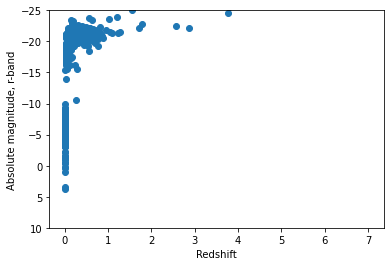

In [19]:
#Put your code for the scatter plot of redshift and absolute magnitude here. 
#Don't forget axis labels, and that brighter magnitudes are smaller numbers (reverse the y-axis)

plt.scatter(gals['z'], gals['Mr'])
#plt.xlim(0.01,5)
plt.ylim(10,-25)
plt.xlabel('Redshift')
plt.ylabel('Absolute magnitude, r-band')
plt.show() 


What features do you see in this plot? TYPE YOUR ANSWER IN THIS BOX BEFORE READING ON. 

Meanwhile I'll show you how to show an image here. This is Stephan's Quintet imaged by HST. It's pretty easy to put images into Markdown boxes it turns out (yes this is words to fill in space). 

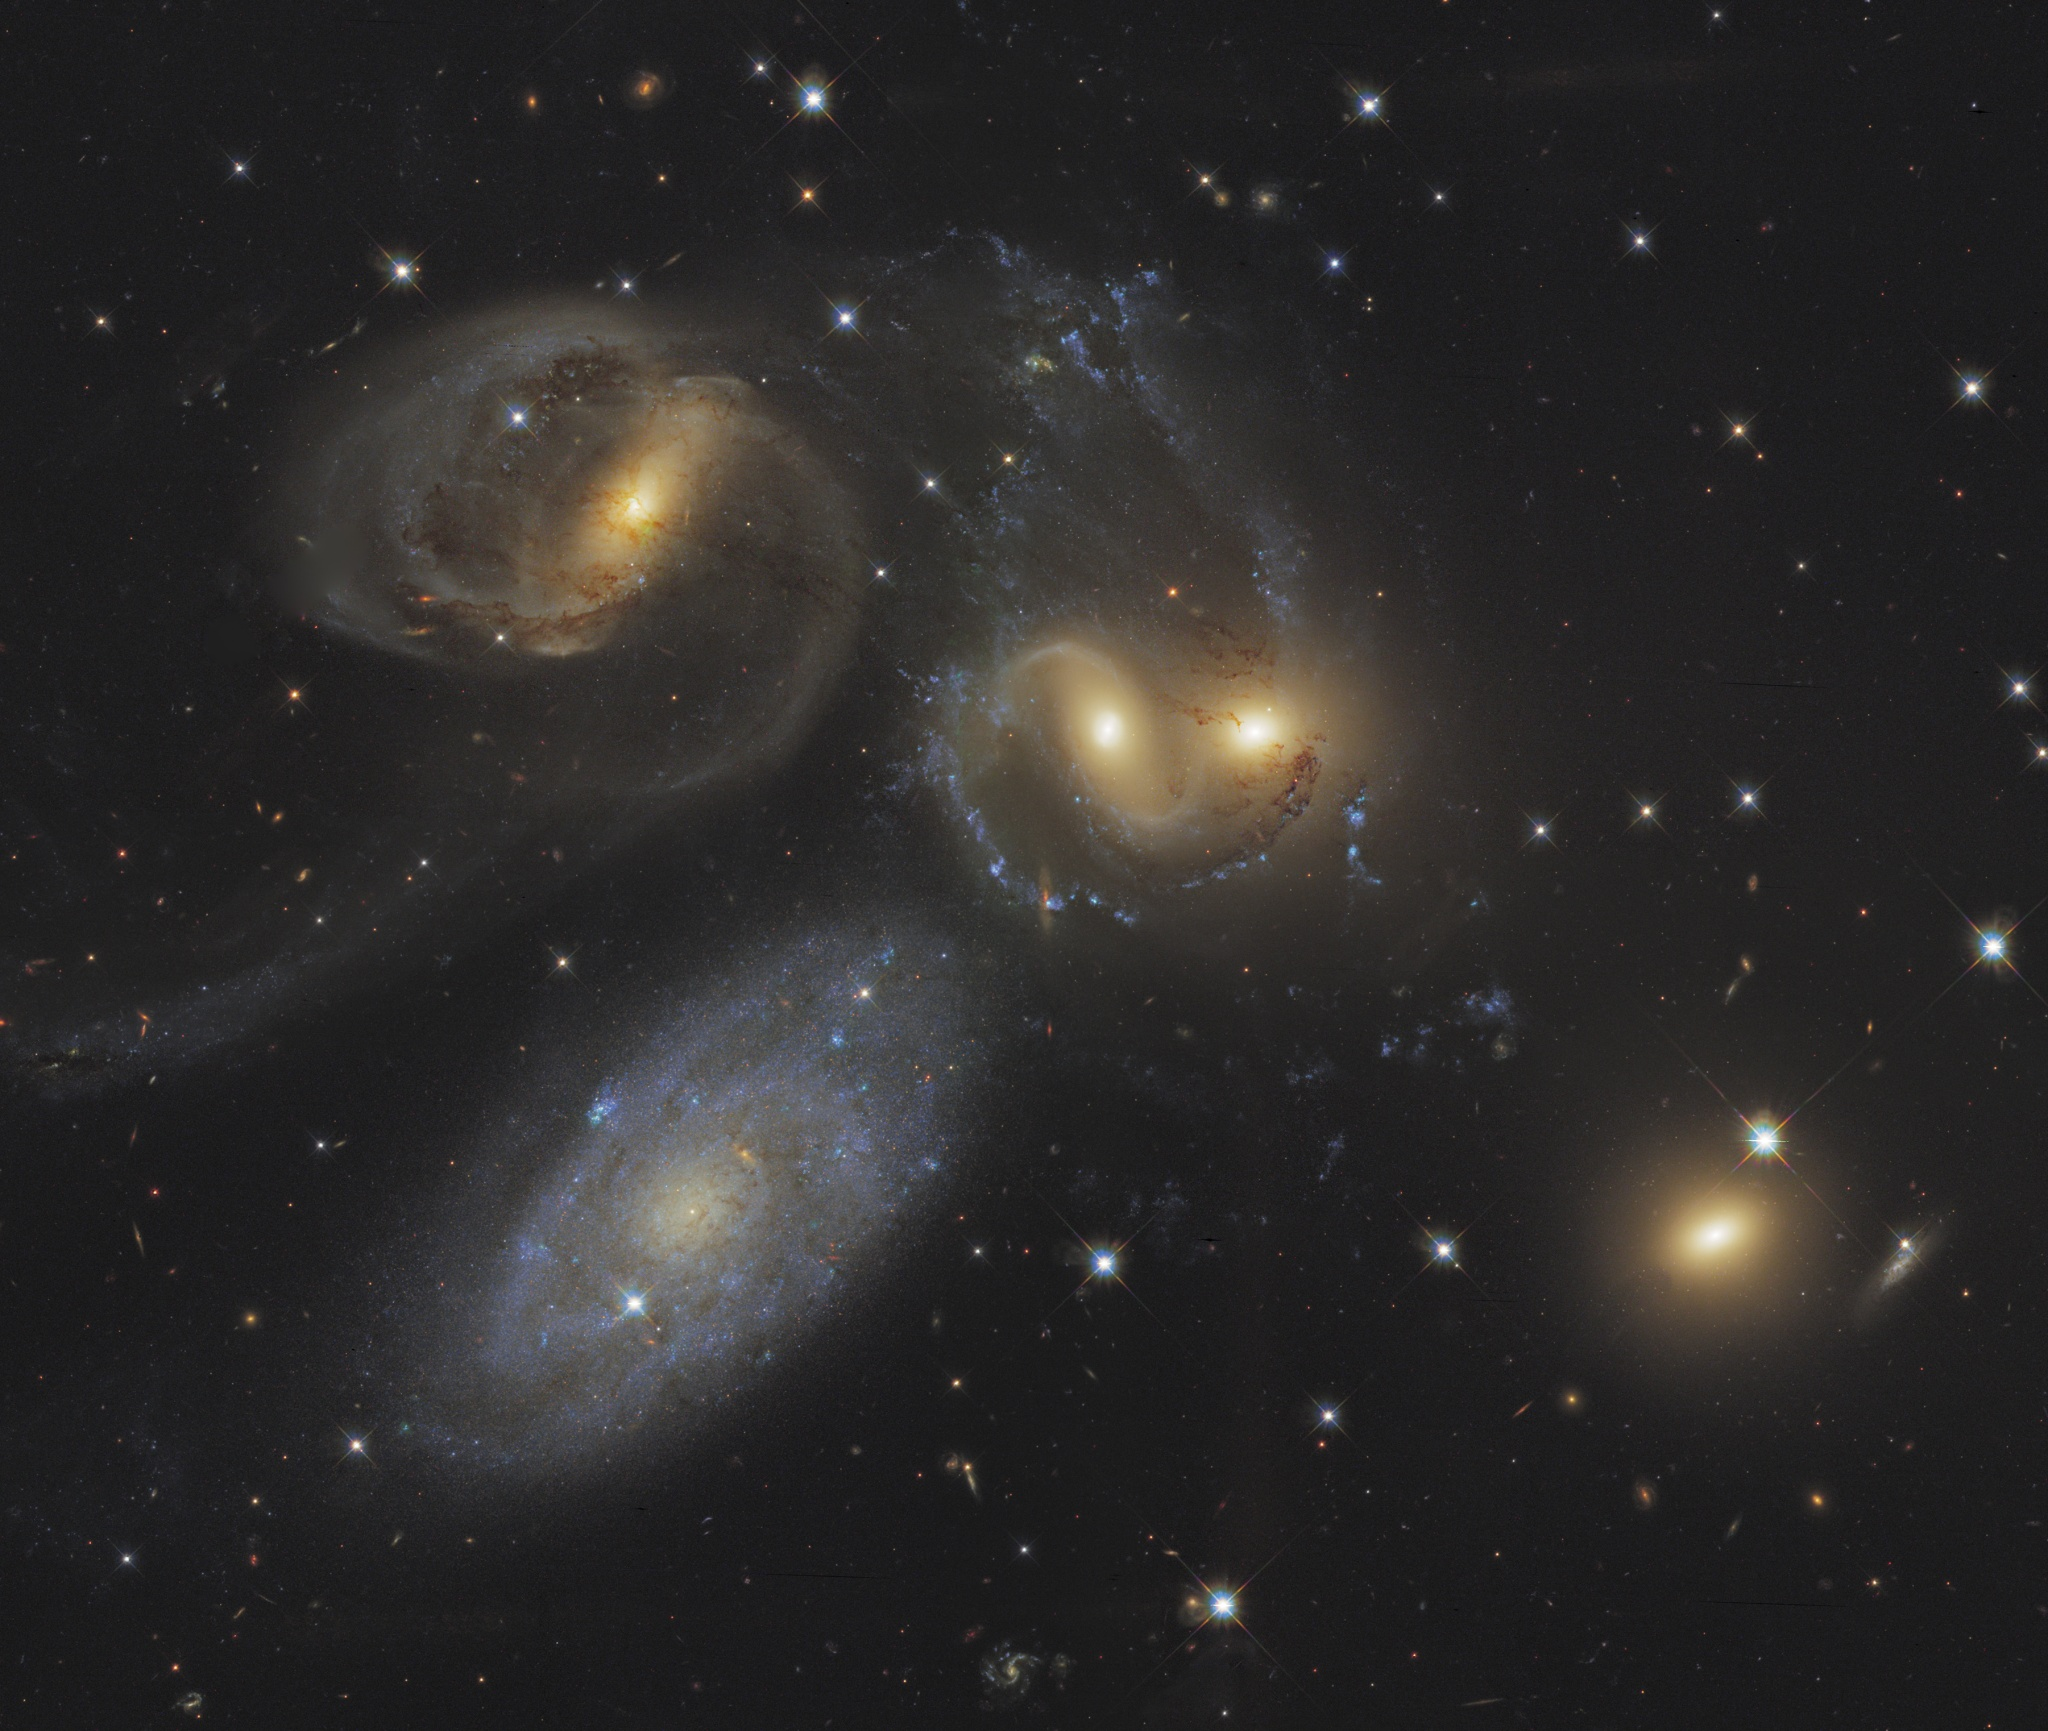

### Magnitude and Redshift limits for a volume limited sample

OK now we've taken up some space, let's discuss the features in that plot. 
* You might notice some really odd dim magnitudes for z<0.01 or so - this is because you can't use Hubble's Law for the nearest galaxies to get distances, so we should filter those out. 
* Large range in redshift: it'll turn out that for z>0.08 or so, the galaxies get really small in angular scale (some people call this "blobbology" because they all look like "blobs"), and I want you to be able see what your galaxies look like, so we'll get rid of anything z>0.08
* Maximum brightness, at about $M_r\simeq-23$ mags - this is real - there is a maximum size for a galaxy you will see in a finite volume of the Universe (bigger the volume the larger this is... although eventually there just is a maximum size for a single galaxy). 
* Hook shape - looks like some kind of minimum brightness of galaxy in the data which scales with distances... this is an observational effect - we can see brighter galaxies at larger distances. So for a fair sample (see all galaxies at all distances) we should put in a limit on magnitude too. 

Now you might be worrying that if we put all these limits in we'll run out of galaxies, but there are over 1 million galaxies in the SDSS database. We can easilly find 1000 with these properties. 

### Limiting Magnitude

First we have to figure out the correct limiting magnitude. You can find our (or if you are me remember) that for SDSS $r<17.77$ is the observational limit for galaxies. We'll further limit this to $r<17$ to have a sample of bright, well detected galaxies (this is what Galaxy Zoo 2 did - which may also be useful!).

Then we can use Astropy to help us figure out the absolute magnitude of a galaxy with this apparent magnitude at the edge of our volumne ($z=0.08$). Anything brighter than this can be seen throughout the volume, anything dimmer will only be seen in the nearside, and could bias the sample.  

In [15]:
zlim=0.08
DM = Distance(z=zlim,cosmology=WMAP7).distmod
M = 17-DM.value
print('The limiting magnitude for SDSS to z=', zlim , ' is ', M)

The limiting magnitude for SDSS to z= 0.08  is  -20.792372525003756


In [16]:
# In this cell edit a query from above and make a new gals table containing a few thousand galaxies which is just for 
# 0.01 < z < 0.08. and r< 17. To apply the Mr<-20.79 filter we'll have to do some post query filtering. 

query="""
SELECT TOP 5000 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r, s.z
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
   WHERE p.r BETWEEN 0 AND 17.0
  AND s.z BETWEEN 0.01 AND 0.08

"""
gals = CasJobs.executeQuery(query, "dr17")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r,z
objId,,,,,,
1237646796526583841,120.336284,-0.283471,5.965748,17.01026,16.15721,0.054918
1237648672921420193,243.567524,-0.880446,9.966108,17.25845,16.54556,0.070509
1237648673994834517,242.898779,-0.015462,11.035250,17.19777,16.71038,0.024241
1237648673995162093,243.583196,-0.031564,7.713156,16.20889,15.29150,0.030811
1237648674534261345,248.685871,0.402134,6.471163,17.06761,16.43080,0.025639
...,...,...,...,...,...,...
1237657590316990573,160.636629,52.256278,5.059571,16.99566,16.13412,0.065327
1237657590316990707,160.639020,52.270671,8.169374,16.70912,15.84162,0.065112
1237657590316990712,160.634911,52.284956,6.007319,16.92066,16.03954,0.065841


In [19]:
#Put some code here which adds an Mr column and does a filter for Mr<-20.79 (value calculated above)

#d = Distance(z=gals['z'],cosmology=WMAP7,allow_negative=True)
#gals['distmod']=d.distmod
# SIGH NOT WORKING, SO DO THE LONG WAY

H0=70 #H0 in km/s/Mpc
c=3e5 #Speed of ligth in km/s
d = c*gals['z']/H0 # Gives d in Mpc, assuming linear expansion (OK nearby)
d = 1e6*d #D in pc needed for distance modulus
distmod = 5.*np.log10(d) -5.0
gals['distmod']=distmod

gals['Mr'] = gals['r'] - gals['distmod']
fairgals=gals[gals['Mr']<-20.79]
fairgals

,ra,dec,petror90_r,g,r,z,distmod,Mr
objId,,,,,,,,
1237648672921420193,243.567524,-0.880446,9.966108,17.25845,16.54556,0.070509,37.401352,-20.855792
1237648704594575484,223.428623,0.030088,7.623937,16.07695,15.16915,0.045182,36.434927,-21.265777
1237648720694804620,182.184260,-0.540842,22.610530,15.44926,14.49996,0.062584,37.142441,-22.642481
1237648721245175856,212.972764,-0.050660,12.210240,16.10540,15.07619,0.053808,36.814347,-21.738157
1237648721757929638,157.931152,0.255964,8.544595,16.32202,15.39021,0.064742,37.216049,-21.825839
...,...,...,...,...,...,...,...,...
1237657776077144365,128.576811,36.669854,6.096844,17.13488,16.23272,0.064470,37.206907,-20.974187
1237657590316990573,160.636629,52.256278,5.059571,16.99566,16.13412,0.065327,37.235593,-21.101473
1237657590316990707,160.639020,52.270671,8.169374,16.70912,15.84162,0.065112,37.228423,-21.386803


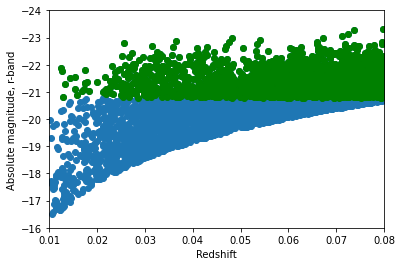

In [20]:
# Make a redshift-MR plot here to check the sample. Plot both the entire query sample (gals)
# and the sample with M_r<-20.79 (fairgals).
# You will need to use different colour points. And plot gals first (why?)
# You should see a roughly rectangular distribution in gals
# from 0.01<z<0.08 and -20.79> M_r > -23.5 ish. 
# Why are there fewer bright galaxies at the lower redshifts?
# What galaxies are removed? 

plt.scatter(gals['z'], gals['Mr'])
plt.scatter(fairgals['z'], fairgals['Mr'],c='green')
plt.xlim(0.01,0.08)
plt.ylim(-16,-24)
plt.xlabel('Redshift')
plt.ylabel('Absolute magnitude, r-band')
plt.show() 

## V. A Famous Plot in Extragalactic Science

You are already familiar with the use of colour-magnitude plots in stars, and we already probably saw some in our reading for galaxies. Let's make a $(g-r)$ vs. $M_r$ plot for our sample of galaxies. We'll actually keep both the entire sample, and the subset which we know we can see across the entire volume, as it'll make for some interesting plots. 

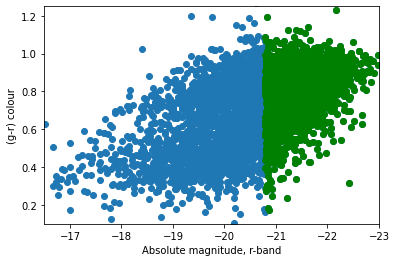

In [21]:
# Code to add a colour column
fairgals['grcolour']=fairgals['g']-fairgals['r']
gals['grcolour']=gals['g']-gals['r']

#Code for plot
plt.scatter(gals['Mr'], gals['grcolour'])
plt.scatter(fairgals['Mr'], fairgals['grcolour'],c='green')
plt.ylim(0.1,1.25)
plt.xlim(-16.5,-23)
plt.ylabel('(g-r) colour')
plt.xlabel('Absolute magnitude, r-band')
plt.show() 


Both this plot, and the earlier one looking at the magnitude redshift distribution are starting to reveal the limitations of the scatter plot as a data visualisation when there are a lot of points. A scatter plot with a lot of overlapping data points can be challenging to understand. 

The "alpha" parameter in the "scatter" function allows you to modify the transparency of markers on the plot. You may want to try changing this value within the range 0-1 to see the difference it makes.  

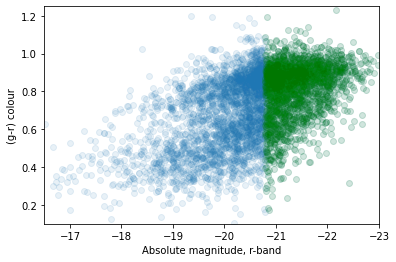

In [22]:
#Code for plot using alpha
plt.scatter(gals['Mr'], gals['grcolour'],alpha=0.1)
plt.scatter(fairgals['Mr'], fairgals['grcolour'],c='green',alpha=0.1)
plt.ylim(0.1,1.25)
plt.xlim(-16.5,-23)
plt.ylabel('(g-r) colour')
plt.xlabel('Absolute magnitude, r-band')
plt.show() 

If even a very low value for the "alpha" parameter does not clarify densely clustered points, a color-coded density plot (shown below) is just one of various outher ways you can make a crowded plot more understandable.

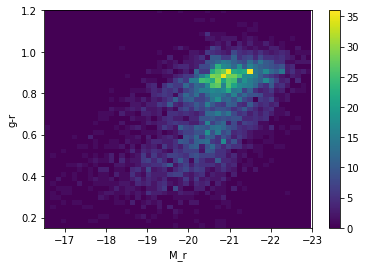

In [27]:
#Code for a colour code density plot. 

# Bit of cleaning to help the histogram (try doing it without this step if you like!)
plotgals=gals[(gals['Mr']>-23) & (gals['Mr']<-16) & (gals['grcolour']>0.1) & (gals['grcolour']<1.25)]

mr = plotgals['Mr']
colour=plotgals['grcolour']

nbins=50
plt.hist2d(mr,colour,bins=nbins)
plt.ylabel('g-r')
plt.xlabel('M_r')
plt.ylim(0.15,1.2)
plt.xlim(-16.5,-23)
plt.colorbar()
plt.show()

**Your Turn:** Now make some other version of this plot (e.g. with contours, or other point styles). Anything you like is fine. 

Extension activity: One technique for making nicer plots, is to use other people's code to do it! Astronomers in general have a wonderful open code philosophy, so you can find tons of code on [Github](www.github.com). 

For example, my collaborator Ross Hart put all the code he used to make figures for a paper we worked on together [Masters et al. 2019]() in this [Github Notebook](https://github.com/RossHart/Hubble_sequence/blob/master/gz2_vs_data.ipynb). 

Or my collaborator [Coleman Krawcyzk](https://github.com/CKrawczyk) also puts up loads of code. For example here's his [Density plot](https://github.com/CKrawczyk/densityplot) code. 

To run other people's code you need to first have it in the Folder you have this notebook. Watch out for dependencies too.  

## VI. Storing results for later use
The next code block saves the data table "gals" as an HD5 file and as a comma-separated values (CSV) file.

To see these files, go back to your iPython notebook dashboard (the page from which you opened this notebook). Make sure you are in the persistent folder. You should see your files there. Click on the file names to preview.


In [28]:
# store result as HDF5 file 
h5store = pandas.HDFStore('GalaxySample.h5')
h5store['galaxies']=gals
h5store.close()

# store result as CSV file
gals.to_csv('GalaxySample.csv', sep=',')

print ("Done.")

Done.


## VII. Retrieve thumbnail cutouts of galaxies and show them on screen
SkyServer has a service that will produce a color image cutout of certain dimensions around a specified position, displayed as a JPG thumbnail.

The code below iterates through each galaxy in a list and calls the image cutout generator for each galaxy. The scale of the image depends on the Petrosian radius of the galaxy.

We don't want to do this with 1000 galaxies, so lets first pick out 16 big (angular scale) galaxies. 

In [29]:
# Find the code from above which does that and put it here. 

query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr17")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,g,r
objId,,,,,
1237658424623104043,149.646529,6.960838,13.30879,16.32425,15.41649
1237671122693193777,149.650944,13.255304,13.64148,14.62470,14.27268
1237648720143712324,149.654673,-0.929505,12.09609,15.62343,14.68135
1237648722828066973,149.659337,1.057981,20.63465,15.45252,14.55437
1237665127456899083,149.667064,28.877556,15.23387,14.55123,13.63257
1237654652030746680,134.562077,47.176213,12.90297,16.39030,15.43807
1237678617423183997,12.156608,1.247656,13.13330,15.87933,15.04946
1237649920582811786,30.300434,14.103373,13.31015,16.69100,16.05856
1237651251512017170,239.025963,52.154673,17.11200,16.36437,15.82378


Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


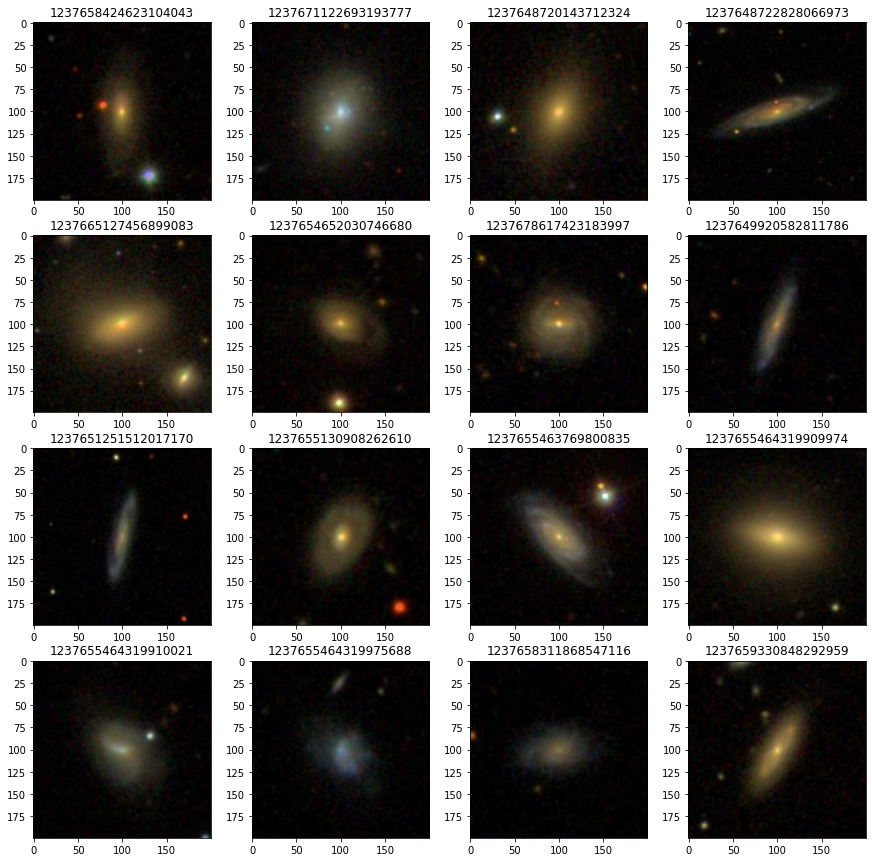

In [31]:
#Now run this code to get the images. 

# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gals)
for index,gal in gals.iterrows():           # iterate through rows in the DataFrame
    i = i + 1
    if i<17:
        print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
        if (i == nGalaxies):
            print('Plotting images...')
        scale=2*gal['petror90_r']/pixelsize/width
        img= SciServer.SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR13')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(index)                              # show the object identifier (objId) above the image.

This should demonstrate the two main types of galaxy morphology in the Universe. You probably heard about this in ASTR204, but if you need a refresher read over [Types of Galaxies](https://openstax.org/books/astronomy/pages/26-2-types-of-galaxies) in OpenStax Astronomy. 

Describe in your own words what galaxy morphology is and what the main types of galaxies are: 

[PUT YOUR ANSWER HERE]

## Activities

Please pick at least one of these activites to do in the cells below. In all cases make sure to write some words reflecting on what you found. If you are not sure discuss with KLM. 

1. Generate samples of red and blue galaxies (use the plots we made above of colour and magnitude to figure out a sensible colour cut to use), and inspect the images of a reasonable number of them (e.g. 16 is fine, more if you like). Can you make any general statements about the correlation between colour and morphology in galaxies.

2. Similar to (1) but try to use the Galaxy Zoo morphologies (e.g. the table called ["zoo2photoz"](http://cas.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+zoo2MainSpecz+U)). Make a colour-magnitude diagram of just spirals and just ellipticals. Make some images of red spirals and/or blue ellipticals.

3. Make a plot of your choice of physical galaxy properties (anything you can find in any of the SDSS tables is fine - e.g. masses, star formation rates, colours, luminosities, anything else which can be measured from spectra or photometry of a galaxy). You may like to discuss ideas with KLM to seek interesting choices, or what might be available. 

4. Make a plot of the fraction of spiral galaxies that have bars as a function of colour (hint: histograms will be useful here, and think about pre-selection). E.g. this is like the top panel of Figure 3 from [Masters et al. 2011](https://ui.adsabs.harvard.edu/abs/2011MNRAS.411.2026M/abstract) (only probably prettier, as those plots were made before KLM knew any python). If you'd done that 10 years ago you could have published it.... 